In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Results

In [11]:
result_example = 'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Salmonella_enterica/Results/model_gset_1_0/all/f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

experiments = pd.MultiIndex.from_product([['Length_1', 'Length_2', 'Length_3', 'Length_4'], [0, 1, 2, 3, 4]])

results = pd.DataFrame(index = antibiotics, columns = experiments)
results_sd = pd.DataFrame(index = antibiotics, columns = experiments)

In [12]:
for i in [1, 2, 3, 4]: #path length
    for j in [0, 1, 2, 3, 4]: #replicate
        result_file = f'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Salmonella_enterica/Results/model_gset_{i}_{j}/all/f1.tab'
        with open(result_file, 'r') as result:
            for line in result:
                values = line.split('\t')
                results.loc[values[0]][f'Length_{i}'][j] = np.around(float(values[1]), decimals = 3)
                results_sd.loc[values[0]][f'Length_{i}'][j] = np.around((float(values[3])- float(values[2]))/3.92, decimals = 3)

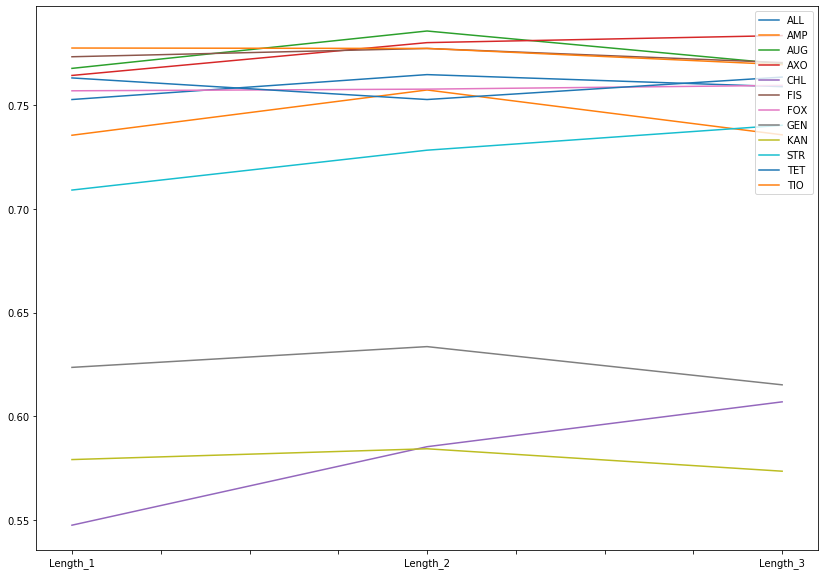

In [13]:
mean_results = pd.DataFrame(index = antibiotics, columns = ['Length_1', 'Length_2', 'Length_3', 'Length_4'])

for i in [1, 2, 3]: #path length
    mean_results[f'Length_{i}'] = results.loc[antibiotics][f'Length_{i}'].mean(axis = 1)
    
mean_results.T.plot(figsize = (14,10)).legend(loc='upper right')

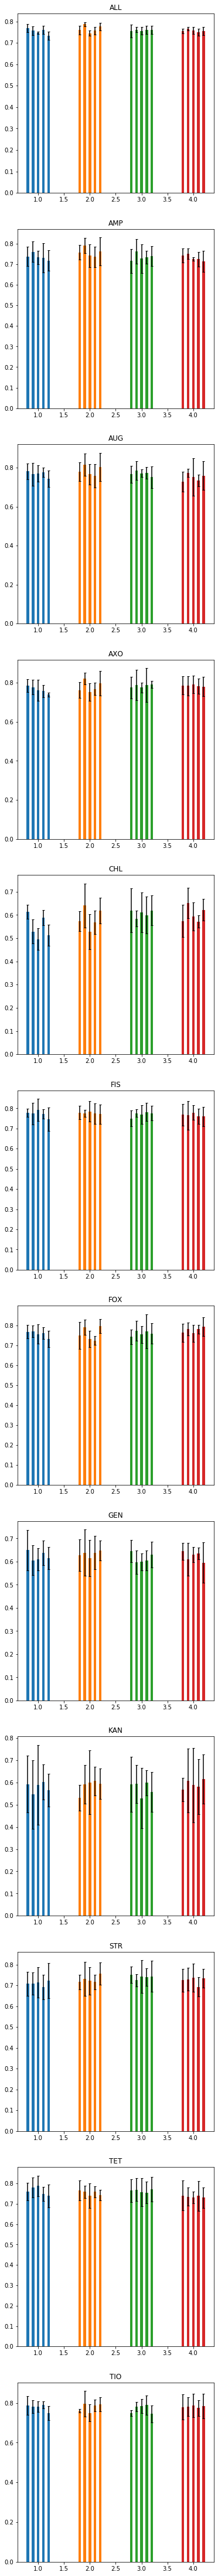

In [16]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
figure, axis = plt.subplots(len(antibiotics), figsize=(6, 80))
for r in range(5):
    for l in [1, 2, 3, 4]:
        c = colors[l-1]
        result_file = f'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Salmonella_enterica/Results/model_gset_{l}_{r}/all/f1.tab'
        with open(result_file, 'r') as result:
            k = 0
            for line in result:
                values = line.split('\t')
                axis[k].bar(l-0.2+(0.1*r), float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                            color = c, ecolor = 'k', width = 0.05, capsize=2, align = 'center')
                k+=1
                
for i in range(len(antibiotics)):
    axis[i].set_title(antibiotics[i])

plt.show()

In [17]:
for i in [1, 2, 3, 4]:
    globals()[f'dist_results{i}'] = pd.DataFrame(index = antibiotics, columns = ['mean', 'sd'])
    for j in antibiotics:
        globals()[f'dist_results{i}'].loc[j, 'mean'] =  results.loc[j, f'Length_{i}'].mean()
        globals()[f'dist_results{i}'].loc[j, 'sd'] =  ((results_sd.loc[j, f'Length_{i}'] @ results_sd.loc[j, f'Length_{i}'])/25)**0.5

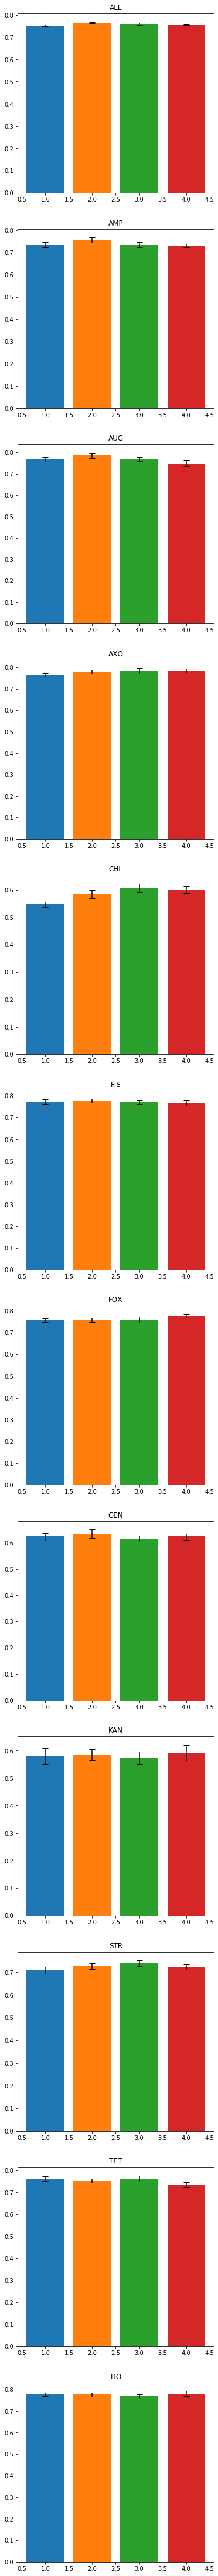

In [19]:
#colors = ['r', 'b', 'g']
figure, axis = plt.subplots(len(antibiotics), figsize=(6, 80))
for l in [1, 2, 3, 4]:
    c = colors[l-1]
    result_df = globals()[f'dist_results{l}']
    for j in range(len(antibiotics)):
        axis[j].bar(l, result_df.loc[antibiotics[j], 'mean'], yerr = result_df.loc[antibiotics[j], 'sd'], ecolor = 'k',capsize=5, align = 'center')

for i in range(len(antibiotics)):
    axis[i].set_title(antibiotics[i])
    #axis[i].set_ylim([0.5,1])

plt.show()